# Sistema de Recomendación de Cultivos
## Entrega 1: EDA completo

**Machine Learning**

**Profesor:** Marco Terán  
**Fecha:** 2025/09/30

**Integrantes**

- Daniel Alejandro Garcia Zuluaica
- Edward Alejandro Rayo Cortés
- Elizabeth Toro Chalarca

___

## 📋 Tabla de Contenidos

1. **Configuración del entorno**
2. **Comprensión del Negocio**
3. **Obtención y Comprensión de Datos**
4. **Análisis Exploratorio (EDA)**

---

In [1]:
print("¡Bienvenidos al primer notebook!")

¡Bienvenidos al primer notebook!


---

## 1. Configuración del Entorno

### ¿Por qué importan las versiones?

En ML, la reproducibilidad es crucial. Imagina que tu modelo funciona perfectamente en tu computadora pero falla en producción. La causa más común: diferentes versiones de librerías.

**Regla de oro**: Siempre documenta y verifica las versiones de tus dependencias.

### Librerías que usaremos

- **NumPy**: El motor matemático de Python. Maneja arrays y operaciones numéricas eficientemente
- **Pandas**: Como Excel con superpoderes. Organiza datos en DataFrames (tablas)
- **Matplotlib/Seaborn**: Nuestros artistas. Crean visualizaciones profesionales
- **Scikit-learn**: La navaja suiza del ML. Contiene algoritmos, métricas y utilidades

### Configuración visual

Los defaults de matplotlib no son los más bonitos. Vamos a configurar:
- Estilo consistente para todos los gráficos
- Tamaños legibles
- Colores agradables
- Formato de números apropiado

In [2]:
# Configuración inicial del entorno
import sys
import warnings
warnings.filterwarnings('ignore')

# Verificar versión de Python
assert sys.version_info >= (3, 7), "Este notebook requiere Python 3.7 o superior"

print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")

✅ Python 3.12 instalado correctamente


## Importando Librerias

Descargarems las librerias necesarias para utilizar el modelo, esto solo se ejecuta una vez

In [2]:
pip install -r ../requirements.txt

  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.

### Validación de librerias

Se verifica que las librerias que vamos a usar estén completamente descargadas


- **NumPy**
- **Pandas**
- **Matplotlib/Seaborn**
- **Scikit-learn**

In [3]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


#### Verificar versiones de librerías críticas
Se valida que tengamos la versión mínima de las librerias

In [ ]:

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), "Requiere scikit-learn >= 1.0.1"
print(f"✅ scikit-learn {sklearn.__version__} instalado")

✅ scikit-learn 1.7.2 instalado


### Proceso Iterativo CRISP-DM

El siguiente fragmento de código permite visualizar las fases del proceso CRISP-MD

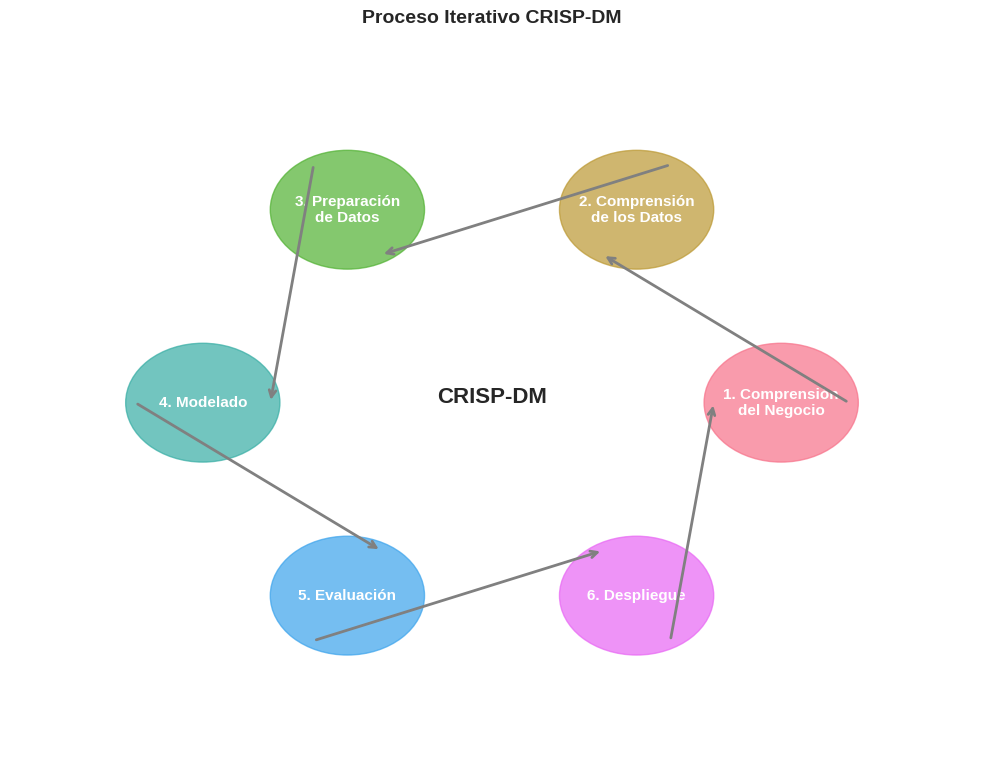

In [ ]:
from IPython.display import Image, display
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Definir las fases
phases = [
    "1. Comprensión\ndel Negocio",
    "2. Comprensión\nde los Datos", 
    "3. Preparación\nde Datos",
    "4. Modelado",
    "5. Evaluación",
    "6. Despliegue"
]

# Posiciones en círculo
angles = np.linspace(0, 2*np.pi, len(phases), endpoint=False)
x = np.cos(angles)
y = np.sin(angles)

# Dibujar el ciclo
for i in range(len(phases)):
    circle = plt.Circle((x[i]*3, y[i]*3), 0.8, color=f'C{i}', alpha=0.7)
    ax.add_patch(circle)
    ax.text(x[i]*3, y[i]*3, phases[i], ha='center', va='center', 
            fontsize=11, fontweight='bold', color='white')
    
    # Flechas de conexión
    next_i = (i + 1) % len(phases)
    ax.annotate('', xy=(x[next_i]*2.3, y[next_i]*2.3), 
                xytext=(x[i]*3.7, y[i]*3.7),
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

ax.text(0, 0, 'CRISP-DM', fontsize=16, fontweight='bold', ha='center')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
plt.title("Proceso Iterativo CRISP-DM", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 💼 2. Fase 1: Comprensión del Negocio <a name="business_understanding"></a>

### El problema de seleccionar un cultivo invalido

**Contexto**: Imagina que eres un agricultor y quieres determinar cuál sería el mejor cultivo para sembrar sin verte afectado por factores de perdidas económicas, mal uso de los recursos y/o degradaciones ambientales.

La agricultura es fundamental para la seguridad alimentaria y el desarrollo económico. Los agricultores a menudo enfrentan desafíos al seleccionar el cultivo adecuado 
para su tierra según las condiciones del suelo y el ambiente. Una mala selección de cultivos puede llevar a:
 
**Problema actual**:
- Rendimientos reducidos
- Pérdidas económicas
- Uso ineficiente de recursos
- Degradación ambiental


**Solución propuesta**: Encontrar los parámetros y modelo que mejor se adapten para predecir el cultivo más adecuado para cultivar basándose en nutrientes del suelo y parámetros agroclimáticos.

### Definiendo el éxito

* **Métrica de negocio**: 

* **Métrica técnica**: Error Absoluto Medio (MAE) < 

* **¿Por qué ?**

### Preguntas críticas antes de empezar

**1. ¿Realmente necesitamos ML?**

**2. ¿Qué pasa si el modelo falla?**

**3. ¿Cómo mediremos el impacto?**


---

## 3. Fase 2: Obtención y Comprensión de Datos <a name="data_understanding"></a>

### El dataset de California Housing

**Origen**: Censo de California de 1990
**Tamaño**: 20,640 distritos
**Granularidad**: Cada fila es un distrito, no una casa individual

### ¿Por qué este dataset?

- **Clásico en ML**: Bien estudiado, podemos comparar resultados
- **Tamaño apropiado**: Ni muy pequeño ni muy grande para aprender
- **Problemas reales**: Tiene valores faltantes y peculiaridades
- **Múltiples tipos de datos**: Numéricos y categóricos

### Estrategia de descarga robusta

Implementaremos:
1. **Caché local**: Si ya descargamos, no repetir
2. **Manejo de errores**: Si falla la descarga, informar claramente
3. **Estructura organizada**: Carpeta datasets/ para todos los datos

### Descarga y Carga de Datos

In [ ]:
# Función mejorada para descargar datos
def load_housing_data():
    """
    Descarga y carga el dataset de California Housing.
    Incluye manejo de errores y caché local.
    """
    import tarfile
    import urllib.request
    
    # Crear directorio si no existe
    data_path = Path("datasets")
    data_path.mkdir(parents=True, exist_ok=True)
    
    tarball_path = data_path / "housing.tgz"
    csv_path = data_path / "housing" / "housing.csv"
    
    # Verificar si ya existe el CSV
    if csv_path.is_file():
        print("📁 Cargando datos desde caché local...")
        return pd.read_csv(csv_path)
    
    # Descargar si no existe
    if not tarball_path.is_file():
        print("📥 Descargando dataset...")
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        try:
            urllib.request.urlretrieve(url, tarball_path)
            print("✅ Descarga completada")
        except Exception as e:
            print(f"❌ Error en descarga: {e}")
            return None
    
    # Extraer archivo
    print("📦 Extrayendo archivos...")
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path=data_path)
    
    print("✅ Datos cargados exitosamente")
    return pd.read_csv(csv_path)

# Cargar datos
housing = load_housing_data()
print(f"\n📊 Dataset cargado: {housing.shape[0]:,} filas × {housing.shape[1]} columnas")

# For Kaggle environment
#housing = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

### 🔍 Análisis Exploratorio de Datos (EDA)

#### ¿Qué es EDA y por qué es crucial?

**EDA es como ser un detective**: Buscas pistas, anomalías y patrones en los datos.

**John Tukey** (inventor del EDA) dijo: "Es mejor una respuesta aproximada a la pregunta correcta que una respuesta exacta a la pregunta incorrecta."

#### Primera impresión: Vista rápida

**¿Qué buscamos?**
- Tipos de datos (numéricos, texto, fechas)
- Dimensiones (filas × columnas)
- Valores faltantes obvios
- Rangos sospechosos

**Herramientas**: head(), info(), describe()

### Primera Inspección de Datos

In [ ]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Mostrar primeras filas con formato mejorado
display(housing.head().style.background_gradient(cmap='coolwarm', subset=['median_house_value']))

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
housing.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(housing.describe().round(2).T)

### Descripción de Variables

### Entendiendo cada variable


In [ ]:
# Diccionario de metadatos
metadata = {
    'Variable': ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                 'total_bedrooms', 'population', 'households', 'median_income', 
                 'median_house_value', 'ocean_proximity'],
    'Tipo': ['Numérica', 'Numérica', 'Numérica', 'Numérica', 'Numérica', 
             'Numérica', 'Numérica', 'Numérica', 'Numérica (Target)', 'Categórica'],
    'Descripción': [
        'Longitud geográfica (más oeste = mayor valor)',
        'Latitud geográfica (más norte = mayor valor)',
        'Edad mediana de las casas en el distrito (años)',
        'Número total de habitaciones en el distrito',
        'Número total de dormitorios en el distrito',
        'Población total del distrito',
        'Número total de hogares en el distrito',
        'Ingreso mediano de los hogares (×$10,000)',
        '🎯 Valor mediano de las casas (USD)',
        'Proximidad al océano'
    ],
    'Valores Faltantes': [
        housing['longitude'].isnull().sum(),
        housing['latitude'].isnull().sum(),
        housing['housing_median_age'].isnull().sum(),
        housing['total_rooms'].isnull().sum(),
        housing['total_bedrooms'].isnull().sum(),
        housing['population'].isnull().sum(),
        housing['households'].isnull().sum(),
        housing['median_income'].isnull().sum(),
        housing['median_house_value'].isnull().sum(),
        housing['ocean_proximity'].isnull().sum()
    ]
}

df_metadata = pd.DataFrame(metadata)
display(df_metadata.style.applymap(
    lambda x: 'background-color: #ffcccc' if x > 0 else '', 
    subset=['Valores Faltantes']
))

---
### Detectando problemas en los datos

#### Análisis de Valores Faltantes (Missing values)


In [ ]:
# Análisis detallado de valores faltantes
def analyze_missing_values(df):
    """Análisis completo de valores faltantes"""
    missing_df = pd.DataFrame({
        'Columna': df.columns,
        'Valores_Faltantes': df.isnull().sum(),
        'Porcentaje': (df.isnull().sum() / len(df)) * 100,
        'Tipo_Dato': df.dtypes
    })
    
    missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values(
        'Porcentaje', ascending=False
    )
    
    if len(missing_df) > 0:
        # Visualización
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Gráfico de barras
        ax1.bar(missing_df['Columna'], missing_df['Porcentaje'], color='coral')
        ax1.set_xlabel('Columna')
        ax1.set_ylabel('Porcentaje de Valores Faltantes (%)')
        ax1.set_title('Valores Faltantes por Columna')
        ax1.axhline(y=5, color='r', linestyle='--', label='Umbral 5%')
        ax1.legend()
        
        # Heatmap de patrones
        import seaborn as sns
        msno_data = df[missing_df['Columna'].tolist()].isnull().astype(int)
        sns.heatmap(msno_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
                   ax=ax2, vmin=-1, vmax=1)
        ax2.set_title('Correlación de Patrones de Valores Faltantes')
        
        plt.tight_layout()
        plt.show()
        
        return missing_df
    else:
        print("✅ No hay valores faltantes en el dataset")
        return None

missing_analysis = analyze_missing_values(housing)
if missing_analysis is not None:
    display(missing_analysis)

### Estadísticas descriptivas: Los números cuentan historias

**¿Qué nos dicen las estadísticas?**

**Media vs Mediana**:
- Si media > mediana: Sesgo a la derecha (valores extremos altos)
- Si media < mediana: Sesgo a la izquierda (valores extremos bajos)
- Si media ≈ mediana: Distribución simétrica

**Desviación estándar**:
- Alta: Mucha variabilidad (cuidado con outliers)
- Baja: Datos concentrados (posible poca información)

**Min/Max sospechosos**:
- Edad máxima = 52: ¿Censura de datos?
- Precio máximo = $500,001: Definitivamente censura

### Análisis Univariado

**¿Qué buscamos en un histograma?**

1. **Forma de campana** (normal): Ideal para muchos algoritmos
2. **Sesgo** (cola larga): Considerar transformación logarítmica
3. **Bimodal** (dos jorobas): Posibles subgrupos diferentes
4. **Uniforme** (plano): Poca información predictiva
5. **Picos extraños**: Valores artificiales o errores

**Ejemplo**: median_house_value tiene pico en $500k → Censura de datos


In [ ]:
# Función para análisis univariado robusto
def univariate_analysis(df, column, target=None):
    """Análisis univariado con estadísticas robustas"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Histograma con KDE
    ax1 = axes[0, 0]
    df[column].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax1)
    ax1.axvline(df[column].mean(), color='red', linestyle='--', label=f'Media: {df[column].mean():.2f}')
    ax1.axvline(df[column].median(), color='green', linestyle='--', label=f'Mediana: {df[column].median():.2f}')
    ax1.set_title(f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Boxplot
    ax2 = axes[0, 1]
    bp = ax2.boxplot(df[column].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title(f'Boxplot de {column}')
    ax2.set_ylabel(column)
    ax2.grid(alpha=0.3)
    
    # Detectar outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    ax2.text(1.1, Q3, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)', 
             fontsize=10)
    
    # 3. Q-Q Plot
    ax3 = axes[1, 0]
    from scipy import stats
    stats.probplot(df[column].dropna(), dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot (Normalidad)')
    ax3.grid(alpha=0.3)
    
    # 4. Relación con target (si existe)
    ax4 = axes[1, 1]
    if target is not None and target in df.columns:
        ax4.scatter(df[column], df[target], alpha=0.5, s=10)
        ax4.set_xlabel(column)
        ax4.set_ylabel(target)
        ax4.set_title(f'{column} vs {target}')
        
        # Agregar línea de tendencia
        z = np.polyfit(df[column].dropna(), df[target][df[column].notna()], 1)
        p = np.poly1d(z)
        ax4.plot(df[column].sort_values(), p(df[column].sort_values()), 
                "r--", alpha=0.8, label=f'Tendencia')
        
        # Calcular correlación
        corr = df[column].corr(df[target])
        ax4.text(0.05, 0.95, f'Correlación: {corr:.3f}', 
                transform=ax4.transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat'))
        ax4.legend()
    else:
        # Estadísticas adicionales
        ax4.axis('off')
        stats_text = f"""
        Estadísticas Robustas:
        
        • Media: {df[column].mean():.2f}
        • Mediana: {df[column].median():.2f}
        • Desv. Estándar: {df[column].std():.2f}
        • MAD: {stats.median_abs_deviation(df[column].dropna()):.2f}
        • Asimetría: {df[column].skew():.2f}
        • Curtosis: {df[column].kurtosis():.2f}
        • Rango: [{df[column].min():.2f}, {df[column].max():.2f}]
        • IQR: {IQR:.2f}
        • CV: {df[column].std()/df[column].mean():.2f}
        """
        ax4.text(0.1, 0.5, stats_text, transform=ax4.transAxes, 
                fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
    
    ax4.grid(alpha=0.3)
    
    plt.suptitle(f'Análisis Univariado: {column}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analizar variables numéricas clave
for col in ['median_income', 'housing_median_age', 'median_house_value']:
    univariate_analysis(housing, col, 'median_house_value')

### Análisis de Variable Categórica

In [ ]:
# Análisis de ocean_proximity
def analyze_categorical(df, cat_col, target_col):
    """Análisis completo de variable categórica"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Distribución de categorías
    ax1 = axes[0, 0]
    counts = df[cat_col].value_counts()
    ax1.bar(counts.index, counts.values, color=plt.cm.Set3(range(len(counts))))
    ax1.set_title(f'Distribución de {cat_col}')
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)
    
    # Agregar porcentajes
    for i, (idx, val) in enumerate(counts.items()):
        ax1.text(i, val, f'{val}\n({val/len(df)*100:.1f}%)', 
                ha='center', va='bottom')
    
    # 2. Pie chart
    ax2 = axes[0, 1]
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=plt.cm.Set3(range(len(counts))))
    ax2.set_title(f'Proporción de {cat_col}')
    
    # 3. Boxplot por categoría
    ax3 = axes[1, 0]
    df.boxplot(column=target_col, by=cat_col, ax=ax3)
    ax3.set_title(f'{target_col} por {cat_col}')
    ax3.set_xlabel(cat_col)
    ax3.set_ylabel(target_col)
    plt.sca(ax3)
    plt.xticks(rotation=45)
    
    # 4. Estadísticas por categoría
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    stats_by_cat = df.groupby(cat_col)[target_col].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    
    table_data = []
    for idx, row in stats_by_cat.iterrows():
        table_data.append([idx, f"{row['count']:.0f}", 
                          f"${row['mean']:,.0f}", 
                          f"${row['median']:,.0f}",
                          f"${row['std']:,.0f}"])
    
    table = ax4.table(cellText=table_data,
                     colLabels=['Categoría', 'N', 'Media', 'Mediana', 'Desv.Est.'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.3, 0.15, 0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Colorear encabezados
    for i in range(5):
        table[(0, i)].set_facecolor('#40E0D0')
        table[(0, i)].set_text_props(weight='bold')
    
    plt.suptitle(f'Análisis de Variable Categórica: {cat_col}', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

analyze_categorical(housing, 'ocean_proximity', 'median_house_value')

### Análisis Geoespacial

**Mapas geográficos:** Location, location, location

**¿Por qué graficar geográficamente?**
- Precios inmobiliarios son altamente locales
- Revelamos clusters (Silicon Valley, LA, San Diego)
- Detectamos anomalías geográficas

**Técnicas**:
- Scatter plot simple: Ver forma de California
- Color por precio: Zonas caras vs baratas
- Tamaño por población: Densidad urbana


In [ ]:
# Visualización geográfica mejorada
def plot_geographical_data(df):
    """Visualización geográfica de California con precios"""
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    # 1. Mapa de densidad
    ax1 = axes[0]
    ax1.scatter(df['longitude'], df['latitude'], alpha=0.1, s=1, c='blue')
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    ax1.set_title('Densidad de Puntos de Datos')
    ax1.grid(True, alpha=0.3)
    
    # 2. Mapa de precios
    ax2 = axes[1]
    scatter = ax2.scatter(df['longitude'], df['latitude'], 
                         c=df['median_house_value'], cmap='YlOrRd',
                         s=df['population']/100, alpha=0.4)
    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')
    ax2.set_title('Precio Medio de Vivienda por Ubicación\n(Tamaño = Población)')
    plt.colorbar(scatter, ax=ax2, label='Precio Medio ($)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Mapa de ingresos
    ax3 = axes[2]
    scatter2 = ax3.scatter(df['longitude'], df['latitude'],
                          c=df['median_income'], cmap='viridis',
                          s=20, alpha=0.4)
    ax3.set_xlabel('Longitud')
    ax3.set_ylabel('Latitud')
    ax3.set_title('Ingreso Medio por Ubicación')
    plt.colorbar(scatter2, ax=ax3, label='Ingreso Medio (×$10k)')
    ax3.grid(True, alpha=0.3)
    
    # Identificar zonas de alto valor
    high_value = df[df['median_house_value'] > df['median_house_value'].quantile(0.9)]
    for ax in axes[1:]:
        ax.scatter(high_value['longitude'], high_value['latitude'],
                  color='red', s=100, alpha=0.5, marker='*',
                  label='Top 10% Precio')
        ax.legend()
    
    plt.suptitle('Análisis Geoespacial de California Housing', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Estadísticas por región
    print("\n📍 Estadísticas por Proximidad al Océano:")
    print("=" * 60)
    stats = df.groupby('ocean_proximity').agg({
        'median_house_value': ['mean', 'median', 'std'],
        'median_income': 'mean',
        'population': 'sum'
    }).round(2)
    display(stats)

plot_geographical_data(housing)

#### Matriz de correlación: Relaciones entre variables

**Correlación de Pearson**:
- Mide relación **lineal** entre variables
- Rango: [-1, +1]
- 0 = Sin relación lineal (¡pero puede haber no-lineal!)

**Interpretación**:
- |r| < 0.1: Muy débil
- 0.1 ≤ |r| < 0.3: Débil
- 0.3 ≤ |r| < 0.5: Moderada
- 0.5 ≤ |r| < 0.7: Fuerte
- |r| ≥ 0.7: Muy fuerte

**Cuidado**: Correlación ≠ Causalidad

In [ ]:
# Análisis de correlación mejorado
def correlation_analysis(df):
    """Análisis de correlación con múltiples métricas"""
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # 1. Correlación de Pearson
    corr_pearson = df[numeric_cols].corr(method='pearson')
    mask = np.triu(np.ones_like(corr_pearson), k=1)
    sns.heatmap(corr_pearson, mask=mask, annot=True, fmt='.2f', 
               cmap='coolwarm', center=0, ax=axes[0],
               vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
    axes[0].set_title('Correlación de Pearson (Lineal)')
    
    # 2. Correlación de Spearman  
    corr_spearman = df[numeric_cols].corr(method='spearman')
    sns.heatmap(corr_spearman, mask=mask, annot=True, fmt='.2f',
               cmap='coolwarm', center=0, ax=axes[1],
               vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
    axes[1].set_title('Correlación de Spearman (Monotónica)')
    
    # 3. Correlación con variable objetivo
    target_corr = df[numeric_cols].corr()['median_house_value'].sort_values(ascending=False)
    colors = ['green' if x > 0 else 'red' for x in target_corr.values]
    target_corr.plot(kind='barh', ax=axes[2], color=colors)
    axes[2].set_title('Correlación con Precio de Vivienda')
    axes[2].set_xlabel('Coeficiente de Correlación')
    axes[2].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[2].grid(True, alpha=0.3)
    
    plt.suptitle('Análisis de Correlación Multi-métrica', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Tabla de correlaciones importantes
    print("\n🔗 Correlaciones Significativas con el Precio:")
    print("=" * 50)
    significant_corr = target_corr[abs(target_corr) > 0.1].drop('median_house_value')
    for var, corr in significant_corr.items():
        strength = "Fuerte" if abs(corr) > 0.5 else "Moderada" if abs(corr) > 0.3 else "Débil"
        direction = "Positiva" if corr > 0 else "Negativa"
        print(f"  • {var:20s}: {corr:+.3f} ({strength} {direction})")

correlation_analysis(housing)

### Detección de Anomalías y Outliers

**Outliers:** ¿Errores o información valiosa?

**Tipos de outliers**:
1. **Errores**: Edad = 999 años → Eliminar
2. **Casos raros pero válidos**: Mansión de $50M → Mantener
3. **Diferentes poblaciones**: Empresa en zona residencial → Investigar

**Métodos de detección**:
- **IQR**: Fuera de Q1-1.5×IQR o Q3+1.5×IQR
- **Z-score**: |z| > 3
- **Isolation Forest**: Algoritmo de ML para anomalías

#### Distribuciones problemáticas

**Alta asimetría (skewness)**:
- Problema: Muchos algoritmos asumen normalidad
- Solución: Transformación log, sqrt o Box-Cox

**Alta curtosis**:
- Problema: Colas pesadas, muchos outliers
- Solución: Winsorization (cap de valores extremos)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def detect_outliers(df):
    """Detección de outliers usando múltiples métodos"""
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Método 1: IQR
    outliers_iqr = pd.DataFrame()
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((numeric_df[col] < Q1 - 1.5 * IQR) | 
                   (numeric_df[col] > Q3 + 1.5 * IQR))
        outliers_iqr[col] = outliers
    
    # Método 2: Z-Score
    from scipy import stats
    z_scores = np.abs(stats.zscore(numeric_df.fillna(numeric_df.median())))
    outliers_zscore = (z_scores > 3)
    
    # Método 3: Isolation Forest
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df.fillna(numeric_df.median()))
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outliers_iso = iso_forest.fit_predict(scaled_data) == -1
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Outliers por columna (IQR)
    ax1 = axes[0, 0]
    outlier_counts = outliers_iqr.sum()
    ax1.bar(range(len(outlier_counts)), outlier_counts.values)
    ax1.set_xticks(range(len(outlier_counts)))
    ax1.set_xticklabels(outlier_counts.index, rotation=45, ha='right')
    ax1.set_title('Outliers por Variable (Método IQR)')
    ax1.set_ylabel('Número de Outliers')
    
    # Plot 2: Distribución de outliers por método
    ax2 = axes[0, 1]
    methods_comparison = pd.DataFrame({
        'IQR': outliers_iqr.any(axis=1).sum(),
        'Z-Score': outliers_zscore.any(axis=1).sum(),
        'Isolation Forest': outliers_iso.sum()
    }, index=['Outliers'])
    methods_comparison.T.plot(kind='bar', ax=ax2, legend=False)
    ax2.set_title('Comparación de Métodos de Detección')
    ax2.set_ylabel('Número de Outliers Detectados')
    ax2.set_xlabel('Método')
    
    # Plot 3: Heatmap de outliers
    ax3 = axes[1, 0]
    sample_outliers = outliers_iqr.head(100)
    sns.heatmap(sample_outliers.T, cmap='RdYlBu_r', cbar=False, ax=ax3,
               yticklabels=True, xticklabels=False)
    ax3.set_title('Mapa de Outliers (Primeras 100 filas)')
    ax3.set_xlabel('Observaciones')
    
    # Plot 4: Resumen estadístico
    ax4 = axes[1, 1]
    ax4.axis('off')
    summary_text = f"""
    Resumen de Detección de Anomalías:
    
    • Total de observaciones: {len(df):,}
    • Outliers por IQR: {outliers_iqr.any(axis=1).sum():,} ({outliers_iqr.any(axis=1).sum()/len(df)*100:.1f}%)
    • Outliers por Z-Score: {outliers_zscore.any(axis=1).sum():,} ({outliers_zscore.any(axis=1).sum()/len(df)*100:.1f}%)
    • Outliers por Isolation Forest: {outliers_iso.sum():,} ({outliers_iso.sum()/len(df)*100:.1f}%)
    
    Variables más afectadas:
    {chr(10).join([f'  - {col}: {count:,} outliers' 
                   for col, count in outlier_counts.nlargest(3).items()])}
    
    Recomendación: Investigar outliers antes de eliminar.
    Pueden contener información valiosa.
    """
    ax4.text(0.1, 0.5, summary_text, transform=ax4.transAxes,
            fontsize=11, verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow'))
    
    plt.suptitle('Análisis de Outliers y Anomalías', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return outliers_iqr, outliers_zscore, outliers_iso

outliers_iqr, outliers_zscore, outliers_iso = detect_outliers(housing)

## 4. Fase 3: Preparación de los Datos

---

## 🎓 Material Adicional y Referencias

### Referencias Bibliográficas

In [6]:
references = """
📚 REFERENCIAS Y LECTURAS RECOMENDADAS:

Libros Fundamentales:
• Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow (2nd ed.)
• Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning
• Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection

Metodología y Procesos:
• Chapman, P. et al. (2000). CRISP-DM 1.0: Step-by-step data mining guide
• Provost, F., & Fawcett, T. (2013). Data Science for Business

Análisis Exploratorio:
• Tukey, J. W. (1977). Exploratory Data Analysis
• Cleveland, W. S. (1993). Visualizing Data
• Wickham, H., & Grolemund, G. (2017). R for Data Science

Recursos Online:
• Documentación scikit-learn: https://scikit-learn.org/stable/
• Kaggle Learn: https://www.kaggle.com/learn
• Google ML Crash Course: https://developers.google.com/machine-learning/crash-course

Papers Relevantes:
• Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32
• Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System
"""

print(references)


📚 REFERENCIAS Y LECTURAS RECOMENDADAS:

Libros Fundamentales:
• Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow (2nd ed.)
• Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning
• Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection

Metodología y Procesos:
• Chapman, P. et al. (2000). CRISP-DM 1.0: Step-by-step data mining guide
• Provost, F., & Fawcett, T. (2013). Data Science for Business

Análisis Exploratorio:
• Tukey, J. W. (1977). Exploratory Data Analysis
• Cleveland, W. S. (1993). Visualizing Data
• Wickham, H., & Grolemund, G. (2017). R for Data Science

Recursos Online:
• Documentación scikit-learn: https://scikit-learn.org/stable/
• Kaggle Learn: https://www.kaggle.com/learn
• Google ML Crash Course: https://developers.google.com/machine-learning/crash-course

Papers Relevantes:
• Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32
• Chen, T., & Guestrin, C. (2016). XGBoost: A Scalabl